> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (TMDB Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#explore">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Exploratory Analysis on TMDB database of over 10,000 movies from 1961 to 2015. Datasheet has information on movie titles, budgets, revenues, average ratings and genre classifications among several other fields.

In [73]:
#import statements for packages


import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
import re


pd.set_option('display.max_rows', 50)

%matplotlib inline
#setting figure size for plots
rcParams['figure.figsize'] = 12,8

## Research Questions

1. What movie genres are usually budget intensive?
2. What movie genres usually generate higher revenues?
3. Who are the best directors based on average rating?
4. Do top budget movies always generate big revenues?
5. Is there any impact of vote count on revenue?
6. Do top rated movies always generate big revenue?
7. What was the best year for movies profit-wise?

<a id='wrangling'></a>
## Data Wrangling


In [5]:
#import statement for data
movie_data = pd.read_csv(r'C:\Users\pgyab\Documents\Data Science & Coding\Udacity - Data Science Scholarship Program By Bertelsmann\Udacity ALX-T Data Science\Project One\tmdb-movies.csv')

In [6]:
#displaying the first 3 rows of dataset
movie_data.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [7]:
#fill genre missing values to "unclassified" to help process data
tmdb = movie_data.fillna({'genres':'unclassified'})

###### The above code was to replace the blank genre cells for some movies with the word "unclassified". This is to make exploratory analyis involving the genre column much easier to do.

<a id='explore'></a>
# Exploratory data Analysis

In [8]:
# get general statistcal overview of dataset
movie_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [9]:
# Evaluate correlation of values among each other numeric value in dataset
tmdb.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.014350,-0.141351,-0.099227,-0.088360,-0.035551,-0.058363,0.511364,-0.189015,-0.138477
popularity,-0.014350,1.000000,0.545472,0.663358,0.139033,0.800828,0.209511,0.089801,0.513550,0.609083
budget,-0.141351,0.545472,1.000000,0.734901,0.191283,0.632702,0.081014,0.115931,0.968963,0.622505
revenue,-0.099227,0.663358,0.734901,1.000000,0.162838,0.791175,0.172564,0.057048,0.706427,0.919110
runtime,-0.088360,0.139033,0.191283,0.162838,1.000000,0.163278,0.156835,-0.117204,0.221114,0.175676
vote_count,-0.035551,0.800828,0.632702,0.791175,0.163278,1.000000,0.253823,0.107948,0.587051,0.707942
vote_average,-0.058363,0.209511,0.081014,0.172564,0.156835,0.253823,1.000000,-0.117632,0.093039,0.193085
release_year,0.511364,0.089801,0.115931,0.057048,-0.117204,0.107948,-0.117632,1.000000,0.016793,-0.066256
budget_adj,-0.189015,0.513550,0.968963,0.706427,0.221114,0.587051,0.093039,0.016793,1.000000,0.646607
revenue_adj,-0.138477,0.609083,0.622505,0.919110,0.175676,0.707942,0.193085,-0.066256,0.646607,1.000000


##### Creating a general correlation table for the several columns, as seen above, helps us to identify how the different variables correlate with one another. It is clear from the correlation table that there is an almost direct relationship between budget and revenue as well as vote count and revenue. It is clear from the statistics that there is a 75% chance that a movie with big budget will generate big revenue too. Also, there was generally an 80% chance that a movie that had huge sum of vote count was also going to have big revenue. 

In [10]:
movie_data.groupby('genres')['vote_average'].mean()

genres
Action                                      5.526984
Action|Adventure                            5.333333
Action|Adventure|Animation                  6.775000
Action|Adventure|Animation|Comedy|Drama     5.600000
Action|Adventure|Animation|Comedy|Family    6.100000
                                              ...   
Western|Drama|Crime|Romance                 5.800000
Western|History                             6.000000
Western|History|War                         5.900000
Western|Horror|Thriller                     4.400000
Western|Thriller                            5.700000
Name: vote_average, Length: 2039, dtype: float64

In [11]:
# A funtion to help set main genre to the first string text when there is more than one genre

def extract_main_genre(data):
    if len(data['genres'].split('|')) > 1:
        genre=data['genres'].split('|')[0]
        return genre
    else:
        genre = data['genres']
        return genre

In [12]:
#Creating the a column, 'main genre' to hold a unified genre name for movies with more than one genre type
tmdb['main genre'] = tmdb.apply(lambda x: extract_main_genre(x), axis=1)

#### I noticed that there were a lot of movies with multiple genres assigned to it. To make it easier to make some exploratory analyis with the genre columns, I wanted to assign just a single genre to each movie. The above code was to pick the first entry before the pipe symbol for each genre entry and assign it as the main genre for each movie with multiple genre assignments. The unique genre classifications for each movie were then stored in a new column named "main genre" which was added to the table.

In [13]:
#checking main genre with highest average rating('vote average')
tmdb.groupby('main genre')['vote_average'].mean().reset_index().sort_values(by=['vote_average'],ascending=False)

,main genre,vote_average
5,Documentary,6.923380
12,Music,6.605000
20,unclassified,6.421739
2,Animation,6.414888
10,History,6.381818
4,Crime,6.214436
6,Drama,6.200448
18,War,6.183051
14,Romance,6.133871
19,Western,6.080952


##### Sorting the genres by average ratings in descending order, it is clear that documentaries had the highest average rating of all the genres.

In [14]:
#grouping by main genre, and looking for genres with highest budget and higher revenue
tmdb.groupby('main genre')[['budget', 'revenue']].agg({'mean'})

,budget,revenue
,mean,mean
main genre,,
Action,2.464650e+07,6.075854e+07
Adventure,4.023351e+07,1.247560e+08
Animation,2.149240e+07,7.145670e+07
Comedy,1.037857e+07,2.930248e+07
Crime,1.343357e+07,3.335110e+07
Documentary,4.308277e+05,1.972712e+06
Drama,1.032756e+07,2.514403e+07
Family,1.835339e+07,6.148926e+07


#### The "adventure"  genre was the most budget intensive and also had the highestr average revenue returns

In [16]:
# checking number of movies per director, sorting on number of movies
tmdb.groupby('director')[['original_title', 'vote_average']].agg({'original_title':'count','vote_average':'mean'}).reset_index().sort_values(by=['original_title'],ascending=False).head(50)

,director,original_title,vote_average
4999,Woody Allen,45,6.444444
878,Clint Eastwood,34,6.508824
4601,Steven Spielberg,29,6.824138
3175,Martin Scorsese,29,6.958621
4033,Ridley Scott,23,6.478261
4600,Steven Soderbergh,22,6.172727
4189,Ron Howard,22,6.377273
2348,Joel Schumacher,21,5.971429
576,Brian De Palma,20,6.355000
4946,Wes Craven,19,5.863158


##### Checking number of movies per director, sorting on number of movies. Woody Allen has the most movies in the database (45 movies in total) followed by Clint Eastwood with 34 movies.

In [17]:
# Checking for top 20 directors with highest average rating, sorting on vote average)
tmdb.groupby('director')[['original_title', 'vote_average']].agg({'original_title':'count','vote_average':'mean'}).reset_index().sort_values(by=['vote_average'], ascending=False).head(20)

,director,original_title,vote_average
3109,Mark Cousins,1,9.20
1245,Derek Frankowski,1,8.80
1148,David Mallet,1,8.70
3176,Martin Scorsese|Michael Henry Wilson,1,8.50
2046,James Payne,1,8.50
4323,Saul Swimmer,1,8.50
940,Curt Morgan,1,8.50
949,D.A. Pennebaker|David Dawkins|Chris Hegedus,1,8.40
318,Anthony Mandler,1,8.40
2578,Jorge RamÃ­rez SuÃ¡rez,1,8.40


In [18]:
gbp_ot_va = tmdb.groupby('director')[['original_title', 'vote_average']].agg({'original_title':'count','vote_average':'mean'}).reset_index()

In [19]:
# finding directors with highest average rating and directed more than 3 movies)
gbp_ot_va[gbp_ot_va['original_title']>3].sort_values(by=['vote_average'], ascending=False)

,director,original_title,vote_average
4413,Shannon Hartman,5,7.520000
845,Christopher Nolan,10,7.470000
4494,Stanley Kubrick,9,7.388889
2985,Louis C.K.,5,7.360000
2623,Joss Whedon,5,7.360000
...,...,...,...
3549,Nick Lyon,6,4.033333
2097,Jason Friedberg|Aaron Seltzer,7,3.900000
846,Christopher Ray,4,3.450000
2084,Jared Cohn,4,3.450000


#### I initially attempted to identify the best director using the highest average rating. I however noticed that the top 20 directors with the highest rating all had just one movie each in the database. I felt a better reflection of who the best director was would be the one who had maintained a high average rating over multiple movies. i therefore wrote the above code to identify the top 20 directors with the highest rating over a minimum of 3 movies. Shannon Hartman comes out top with a rating of 7.5 across 5 movies. One can howver say that Christopher Nolan in second place makes a better case for being seen as the best director since he has an average rating of 7.47 across 10 movies.

## Finding which year was most profitable for movies

In [20]:
# created a column to hold adjusted profit values for each movie
tmdb.loc[:, 'profit_adj'] = tmdb['revenue_adj'] - tmdb['budget_adj']

In [21]:
# find yearly total profit for all movies
profit_adj_yearly = tmdb.groupby('release_year')['profit_adj'].sum().reset_index().set_index('release_year')

In [22]:
# find yearly total budget for all movies
budget_adj_yearly = tmdb.groupby('release_year')['budget_adj'].sum().reset_index().set_index('release_year')

Text(0.5, 1.0, 'total profit by years')

<Figure size 864x576 with 0 Axes>

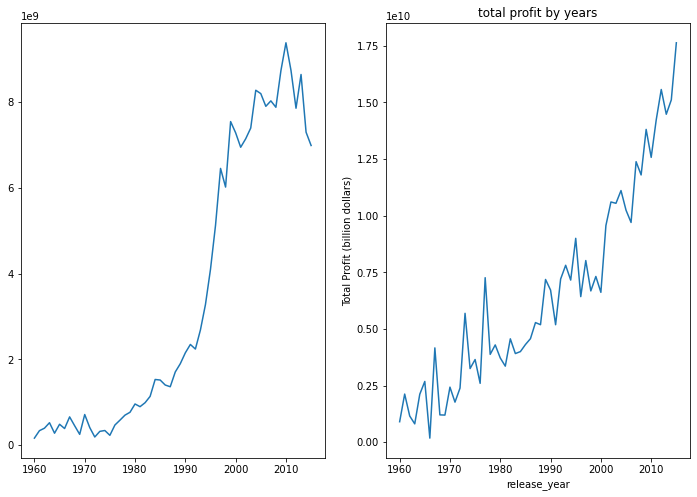

In [89]:
# configuring plot parameters to scale graph
fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(budget_adj_yearly)
plt.xlabel('release_year')
plt.ylabel('Total Budget(billion dollars)')
plt.title('total budget by years')

ax2.plot(profit_adj_yearly)
plt.xlabel('release_year')
plt.ylabel('Total Profit (billion dollars)')
plt.title('total profit by years')


#### Two line charts were used to show how profits and budget for movies have grown over the years. Profit adjusted and budget adjusted were plotted against Release year as can be seem from the two line charts above. The profit adjusted and budget adjusted variables were used in this case to account for inflation and have a healthy comparison across the several decades. 

In [61]:
# Function to find the total number of movies released each year
movies_released_yearly = tmdb.groupby('release_year')['release_year'].count()

Text(0.5, 1.0, 'Total Number of Movies released for each year')

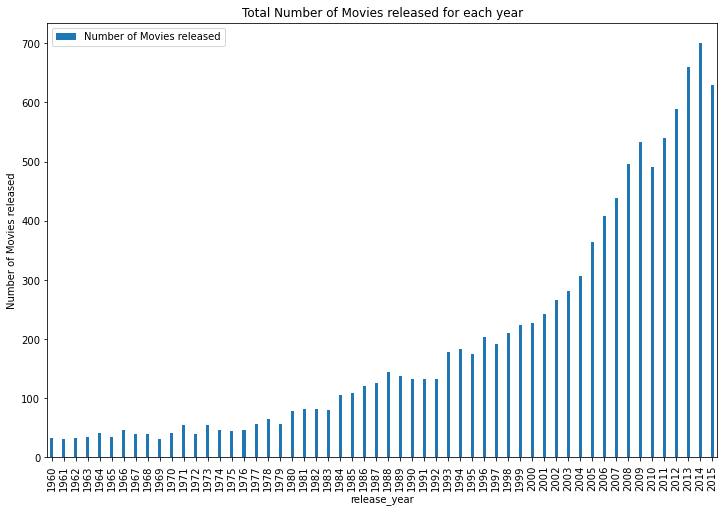

In [85]:
pd.DataFrame(movies_released_yearly).plot.bar(width=0.25)
plt.legend(['Number of Movies released'])
plt.ylabel('Number of Movies released')
plt.title('Total Number of Movies released for each year')



#### The above cart showed that it was not entirely accurate to identify the best year for movies by using total profit because some years (especially the 2000s) had a lot more movies in the database and would therefore have higher profit sums

In [41]:
# Function to find the max profit value for each year
max_profit_yearly = tmdb.groupby('release_year')['profit_adj'].max()

Text(0.5, 1.0, 'Highest Profit Value for each year')

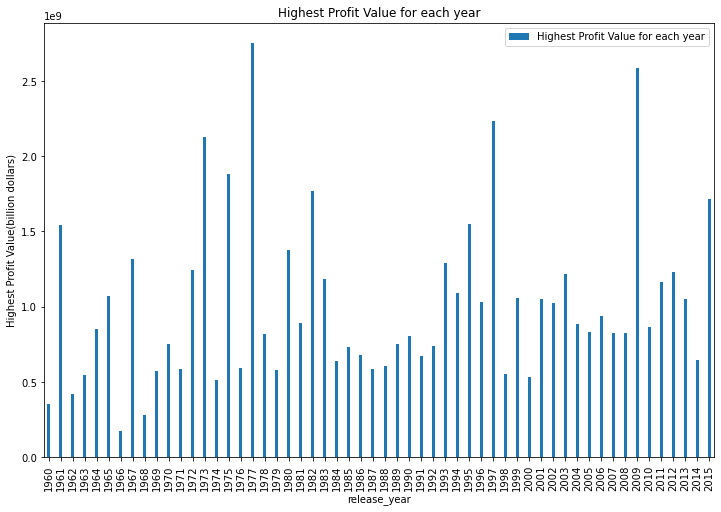

In [82]:
pd.DataFrame(max_profit_yearly).plot.bar(width=0.25)
plt.legend(['Highest Profit Value for each year'])
plt.ylabel('Highest Profit Value(billion dollars)')
plt.title('Highest Profit Value for each year')


#### Another reason why using total profit to pick the best year for movies was wrong was because some years had very high max profit value that could be a case where the profit value of just one high grossing movie could be more than the entire combined profits of all movies in other years. The above plot shows the max profit value for each release year  We therefore needed to find a better way of identifying the best year for movies.

In [25]:
# function for check which movies made profit for each year
def profited(data):
    if data['profit_adj']>0:
        return 1
    else:
        return 0

In [26]:
tmdb['profited?'] = tmdb.apply(lambda x: profited(x), axis=1)

In [27]:
# finding the actual count of movies that made profit for each year
tmdb_profited = tmdb.groupby('release_year')['original_title','profited?'].agg({'original_title':'count', 'profited?':'sum'}).reset_index()

C:\Users\pgyab\AppData\Local\Temp\ipykernel_5680\4088974373.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tmdb_profited = tmdb.groupby('release_year')['original_title','profited?'].agg({'original_title':'count', 'profited?':'sum'}).reset_index()


In [28]:
# calculating the percentage of movies that made profit each year
tmdb_profited['profited_percent'] = (tmdb_profited['profited?']/tmdb_profited['original_title'])*100

#### In a bid to find out which year was the most profitable for movies, I  decided to find out the year that had the highest percentage of movies released making profit. That is, what percentage of movies released made more money than theior budget allocation for each year. A new column called profited was created and populated by subtracting the revenue adjusted from budget adjusted. For each year, the number of movies with values greater than 0 for that column were identified and used to find the percentage of movies releases that year that made profits.

Text(0.5, 1.0, 'Percentage of movies that made profit for each year')

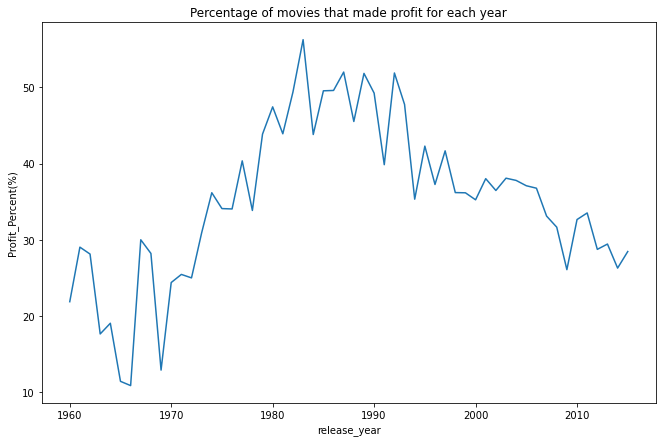

In [30]:
#Plot to show percentage of released movies that profited yearly
tmdb_profited.set_index('release_year')['profited_percent'].plot()
plt.xlabel('release_year')
plt.ylabel('Profit_Percent(%)')
plt.title('Percentage of movies that made profit for each year')

Text(0.5, 1.0, 'Percentage of movies that made profit for each year')

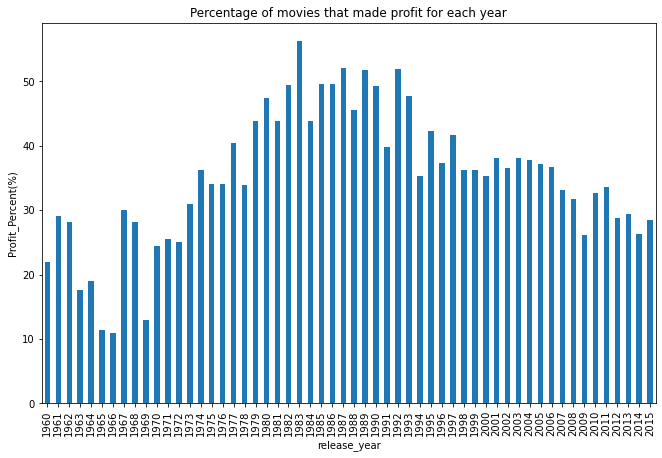

In [31]:
#Plot to show percentage of released movies that profited yearly
tmdb_profited.set_index('release_year')['profited_percent'].plot.bar()
plt.xlabel('release_year')
plt.ylabel('Profit_Percent(%)')
plt.title('Percentage of movies that made profit for each year')

In [32]:
#

#### It can be seen from the above chat that the period between the early 1980s and the mid 1990s were the best years for movies as there was hige percentage of movies released within that period making profit.  

# Conclusion

##### Which genres are the most budget intensive  
The "adventure" was the most budget intensive and also had the highest revenue averages.

##### 1980 to Early 1990s
The 1980's to the early 1990's were the best period to release movies as a higher percentage of released movies made profit when compared with other periods


##### Average Rating
Documentaries were the genre with the highest average ratings followed by music. One could however say that for actual feature length movies, animated movies had the highest average ratings

##### Correlation
Budget and Revenue had a positive correlation. Higher budgets almost always guaranteed higher. There was a 75% chance that a movie with a high budget would generate high revenues.

## Limitations

1. The database does not contain every movie ever produced which means generalisations may not be entirely accurate in all situations.


2. There were too many genre definitions for a single movie in a lot of cases. It would have been very helpful if each movie was assigned one genre definition based on what was dominant across the entire movie. This would help make genre based analysis even more accurate.


3. There were some movies with missing genre field that were replaced with the term "unclassified".


In [33]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 7441-314D

 Directory of C:\Users\pgyab

06/12/2022  03:24 PM    <DIR>          .
06/12/2022  03:24 PM    <DIR>          ..
06/10/2022  06:49 PM    <DIR>          .conda
05/16/2022  12:01 PM                25 .condarc
05/16/2022  12:00 PM    <DIR>          .continuum
06/11/2022  01:13 AM    <DIR>          .ipynb_checkpoints
05/31/2022  06:39 PM    <DIR>          .ipython
05/31/2022  06:34 PM    <DIR>          .jupyter
05/31/2022  06:52 PM    <DIR>          .matplotlib
01/06/2022  09:27 AM    <DIR>          .spss
04/06/2021  11:35 AM    <DIR>          3D Objects
05/16/2022  07:41 AM    <DIR>          anaconda3
06/19/2021  08:46 PM    <DIR>          Apple
04/06/2021  11:35 AM    <DIR>          Contacts
05/30/2022  05:42 PM    <DIR>          Desktop
05/30/2022  11:10 PM    <DIR>          Documents
06/12/2022  03:18 PM    <DIR>          Downloads
04/06/2021  11:35 AM    <DIR>          Favorites
04/26/2021  06:33 PM    <DIR>         